<a href="https://colab.research.google.com/github/krishna123-lang/ML-Supervised-Unsupervised-Iris/blob/main/ML_Project_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORT REQUIRED LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    silhouette_score
)

# For better visualization
sns.set(style="whitegrid")

**LOAD IRIS DATASET**


In [2]:

iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

print("First 5 Rows:")
print(df.head())

First 5 Rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


**DATA EXPLORATION:**

In [3]:

print("\nDataset Info:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())

print("\nClass Distribution:")
print(df['target'].value_counts())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None

Statistical Summary:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%          

**PAIRPLOT VISUALIZATION:**

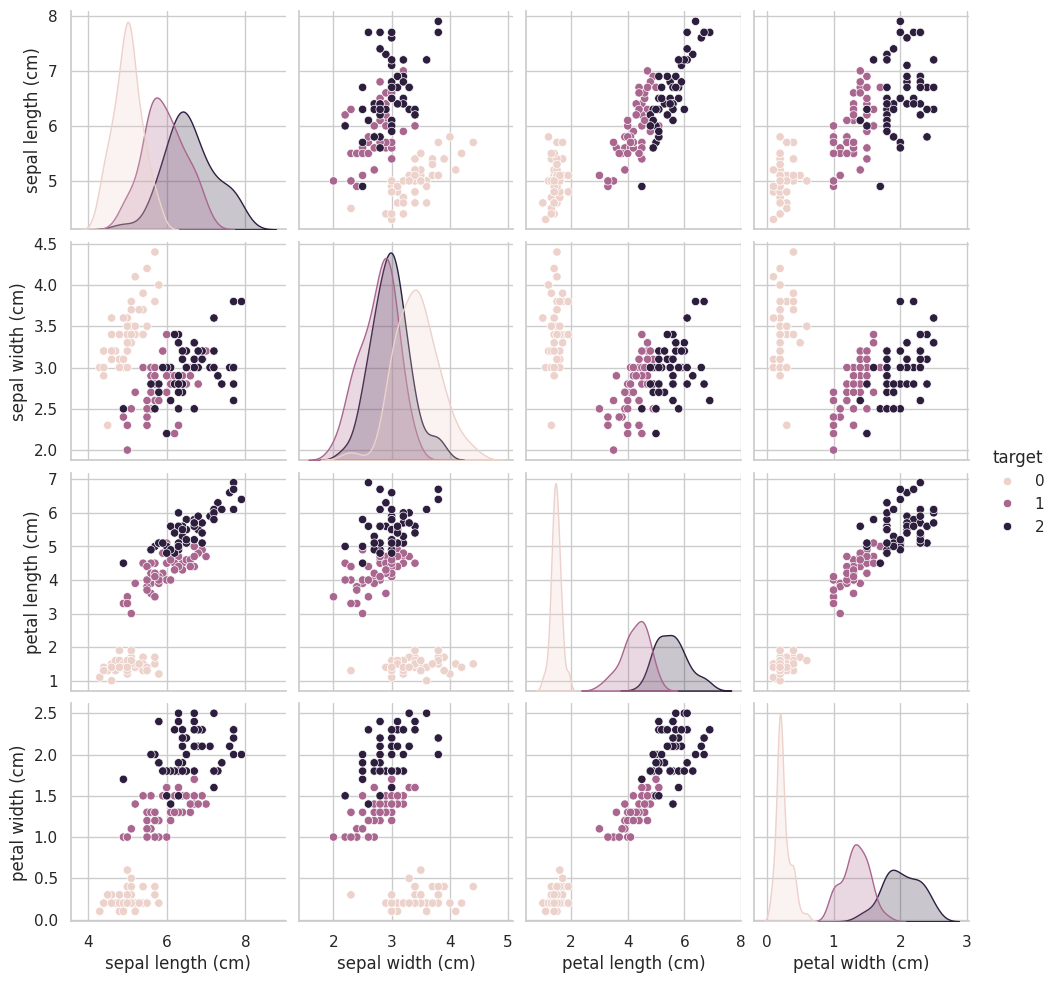

In [4]:
sns.pairplot(df, hue='target')
plt.show()

**Correlation Heatmap**

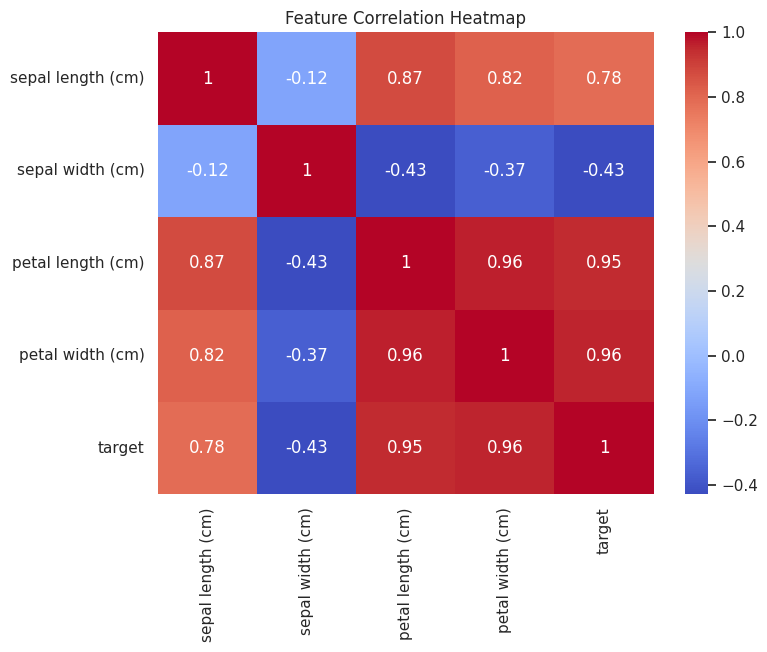

In [5]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

**Supervised Learning — KNN Classification**

---
SPLIT FEATURES & TARGET


In [6]:


X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

**FEATURE SCALING:**

In [7]:


scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**FIND OPTIMAL K VALUE**

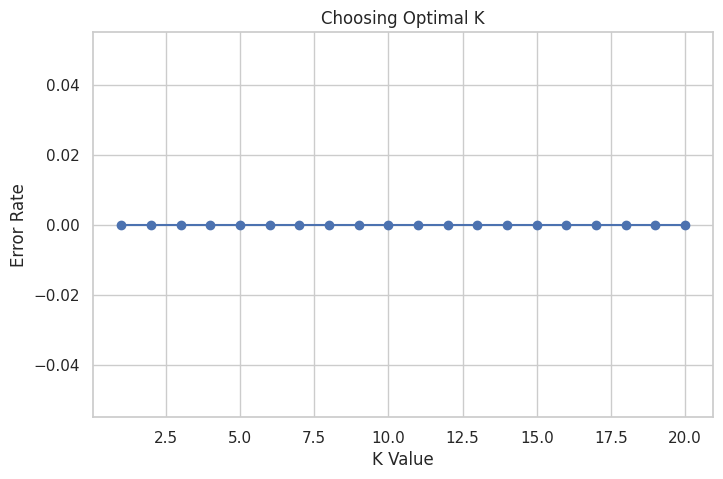

In [8]:

error_rates = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rates.append(1 - accuracy_score(y_test, y_pred))

plt.figure(figsize=(8,5))
plt.plot(range(1, 21), error_rates, marker='o')
plt.title("Choosing Optimal K")
plt.xlabel("K Value")
plt.ylabel("Error Rate")
plt.show()

**TRAIN FINAL MODEL:**

In [9]:


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

**MODEL EVALUATION:**

In [10]:


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**Confusion Matrix:**

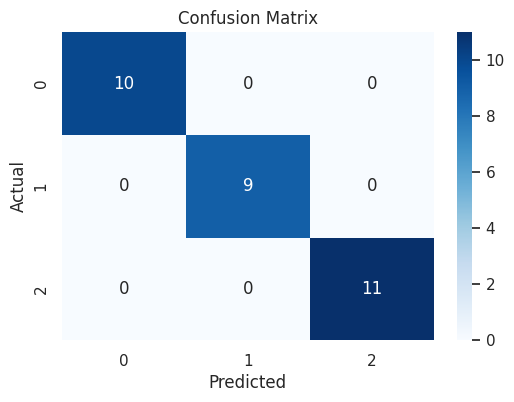

In [11]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True,
            cmap="Blues",
            fmt='d')

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Unsupervised Learning — K-Means Clustering**

---

ELBOW METHOD


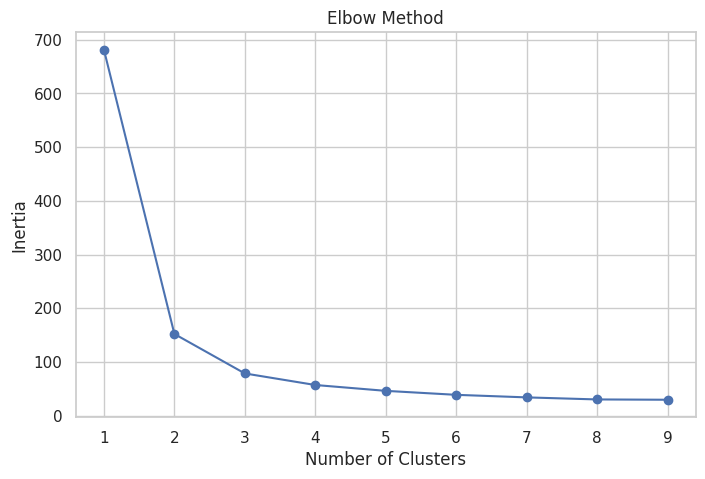

In [12]:

inertia = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 10), inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

**APPLY K-MEANS:**

In [13]:


kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

df['cluster'] = kmeans.labels_

**Cluster Visualization:**

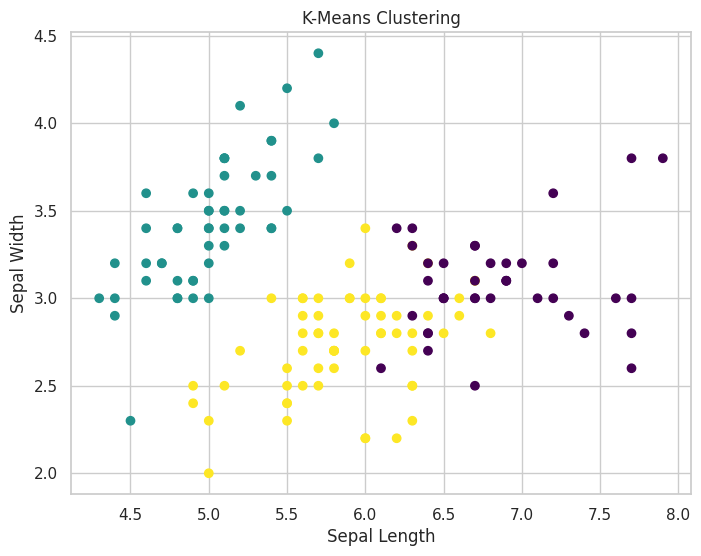

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(df.iloc[:, 0],
            df.iloc[:, 1],
            c=df['cluster'],
            cmap='viridis')

plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("K-Means Clustering")
plt.show()

**Silhouette Score:**


In [15]:
score = silhouette_score(X, df['cluster'])
print("Silhouette Score:", score)

Silhouette Score: 0.551191604619592


**Compare Clusters with Actual Labels**

In [16]:
print(pd.crosstab(df['target'], df['cluster']))

cluster   0   1   2
target             
0         0  50   0
1         3   0  47
2        36   0  14


## Conclusion

- The Iris dataset contains well-separated classes.
- KNN achieved high classification accuracy due to strong feature separability.
- Feature scaling improved distance-based learning performance.
- K-Means successfully identified 3 natural clusters corresponding to species.
- Silhouette score confirmed good cluster separation.
- Petal length and petal width are the most influential features.

This project demonstrates understanding of supervised and unsupervised learning workflows, preprocessing, model tuning, and evaluation.

In [17]:
for i in range(2, 6):
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    print(f"K = {i}, Silhouette Score = {score}")

K = 2, Silhouette Score = 0.6810461692117462
K = 3, Silhouette Score = 0.551191604619592
K = 4, Silhouette Score = 0.49764331793219224
K = 5, Silhouette Score = 0.4930804067193521
